In [3]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
from cmcrameri import cm
from os.path import expanduser

In [4]:
EXPERIMENT_NAME = 'P3856_YHE010'
number_of_runs_in_subset = 10

#### prepare the TFD/E results

In [5]:
# load the results
EXPERIMENT_DIR = '/media/data-4t-a/results-P3856_YHE010/2022-03-28-17-55-06'
RESULTS_DB_NAME = '{}/summarised-results/results.sqlite'.format(EXPERIMENT_DIR)
db_conn = sqlite3.connect(RESULTS_DB_NAME)
tfde_results_df = pd.read_sql_query("select * from sequences", db_conn)
db_conn.close()

In [6]:
# convert the identifications from JSON to Python objects
tfde_results_df['identifications_d'] = tfde_results_df.apply(lambda row: json.loads(row.identifications), axis=1)

In [7]:
def classify_protein(protein):
    result = 'UNKNOWN'
    if 'HUMAN' in protein.upper():
        result = 'Human'
    elif 'YEAST' in protein.upper():
        result = 'Yeast'
    elif 'ECOLI' in protein.upper():
        result = 'E. coli'
    return result

In [8]:
# separate some key metrics into separate columns
tfde_results_df['id_perc_q_value'] = tfde_results_df.apply(lambda row: row.identifications_d['perc_q_value'], axis=1)
tfde_results_df['id_count_all_runs'] = tfde_results_df.apply(lambda row: len(row.identifications_d['run_names']), axis=1)
tfde_results_df['id_number_of_proteins'] = tfde_results_df.apply(lambda row: row.identifications_d['number_of_proteins'], axis=1)

In [9]:
tfde_results_df['id_protein'] = tfde_results_df.apply(lambda row: row.identifications_d['proteins'][0], axis=1)
tfde_results_df['id_species'] = tfde_results_df.apply(lambda row: classify_protein(row.id_protein), axis=1)

In [10]:
tfde_results_df.id_species.unique()

array(['Human', 'E. coli', 'Yeast'], dtype=object)

In [11]:
# remove the results that couldn't be extracted or were not classified as a target
tfde_results_df = tfde_results_df[tfde_results_df.extractions.notnull()].copy()

In [12]:
# convert from JSON to Python objects
tfde_results_df['extractions_l'] = tfde_results_df.apply(lambda row: json.loads(row.extractions), axis=1)

In [13]:
# separate some key metrics into separate columns
tfde_results_df['ext_count_all_runs'] = tfde_results_df.apply(lambda row: len(row.extractions_l), axis=1)

In [14]:
tfde_results_df.sample(n=3)

,sequence,charge,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,id_number_of_proteins,id_protein,id_species,extractions_l,ext_count_all_runs
17047,VQIAVANAQELLQR,2,"{""perc_q_value"": 1.7327119e-05, ""run_names"": [...","[{""run_name"": ""P3856_YHE010_10_Slot1-1_1_5102""...","{'perc_q_value': 1.7327119e-05, 'run_names': [...",0.000017,10,1,sp|Q9Y5L4|TIM13_HUMAN,Human,[{'run_name': 'P3856_YHE010_10_Slot1-1_1_5102'...,10
17868,YIAIVSTTVETKEPEK,2,"{""perc_q_value"": 1.7327119e-05, ""run_names"": [...","[{""run_name"": ""P3856_YHE010_10_Slot1-1_1_5102""...","{'perc_q_value': 1.7327119e-05, 'run_names': [...",0.000017,10,1,sp|P50395|GDIB_HUMAN,Human,[{'run_name': 'P3856_YHE010_10_Slot1-1_1_5102'...,10
2429,DMATETDASLSTLLTETK,2,"{""perc_q_value"": 7.4411221e-05, ""run_names"": [...","[{""run_name"": ""P3856_YHE010_10_Slot1-1_1_5102""...","{'perc_q_value': 7.4411221e-05, 'run_names': [...",0.000074,2,1,sp|Q9Y2W6|TDRKH_HUMAN,Human,[{'run_name': 'P3856_YHE010_10_Slot1-1_1_5102'...,7


In [80]:
tfde_results_df.loc[17047].identifications_d

{'perc_q_value': 1.7327119e-05,
 'run_names': ['P3856_YHE010_8_Slot1-1_1_5100',
  'P3856_YHE010_6_Slot1-1_1_5098',
  'P3856_YHE010_1_Slot1-1_1_5093',
  'P3856_YHE010_7_Slot1-1_1_5099',
  'P3856_YHE010_3_Slot1-1_1_5095',
  'P3856_YHE010_10_Slot1-1_1_5102',
  'P3856_YHE010_4_Slot1-1_1_5096',
  'P3856_YHE010_5_Slot1-1_1_5097',
  'P3856_YHE010_9_Slot1-1_1_5101',
  'P3856_YHE010_2_Slot1-1_1_5094'],
 'number_of_runs': 10,
 'proteins': ['sp|Q9Y5L4|TIM13_HUMAN'],
 'number_of_proteins': 1}

In [79]:
tfde_results_df.loc[17047].extractions_l

[{'run_name': 'P3856_YHE010_10_Slot1-1_1_5102',
  'prob_target': 0.999536993989128,
  'intensity': 4726,
  'inferred': 0},
 {'run_name': 'P3856_YHE010_2_Slot1-1_1_5094',
  'prob_target': 0.9996213632076105,
  'intensity': 3962,
  'inferred': 0},
 {'run_name': 'P3856_YHE010_4_Slot1-1_1_5096',
  'prob_target': 0.9995718412487514,
  'intensity': 4326,
  'inferred': 0},
 {'run_name': 'P3856_YHE010_6_Slot1-1_1_5098',
  'prob_target': 0.9996862011141548,
  'intensity': 4317,
  'inferred': 0},
 {'run_name': 'P3856_YHE010_8_Slot1-1_1_5100',
  'prob_target': 0.9996695764191613,
  'intensity': 3962,
  'inferred': 0},
 {'run_name': 'P3856_YHE010_1_Slot1-1_1_5093',
  'prob_target': 0.99959518347211,
  'intensity': 3456,
  'inferred': 0},
 {'run_name': 'P3856_YHE010_3_Slot1-1_1_5095',
  'prob_target': 0.999442656979806,
  'intensity': 3659,
  'inferred': 0},
 {'run_name': 'P3856_YHE010_5_Slot1-1_1_5097',
  'prob_target': 0.9996305320202233,
  'intensity': 4466,
  'inferred': 0},
 {'run_name': 'P385

#### false identification rate

In [55]:
number_of_unique_peptides = len(tfde_results_df)
number_of_unique_peptides

17958

In [56]:
number_of_unique_nonhuman_peptides = len(tfde_results_df[(tfde_results_df.id_species != "Human")])
number_of_unique_nonhuman_peptides

228

In [57]:
FDR_detection = number_of_unique_nonhuman_peptides/number_of_unique_peptides*100
FDR_detection

1.2696291346475108

#### false transfer rate

In [84]:
tfde_results_df['id_run_names'] = tfde_results_df.apply(lambda row: row.identifications_d['run_names'], axis=1)
tfde_results_df['ext_run_names'] = tfde_results_df.apply(lambda row: [e['run_name'] for e in row.extractions_l], axis=1)

In [90]:
tfde_results_df['transfer_count'] = tfde_results_df.apply(lambda row: len(set(row.ext_run_names)-set(row.id_run_names)), axis=1)

In [91]:
total_transfer_count_tfde = tfde_results_df.transfer_count.sum()
total_transfer_count_tfde

63582

In [92]:
false_transfer_count_tfde = tfde_results_df[(tfde_results_df.id_species != "Human")].transfer_count.sum()
false_transfer_count_tfde

1442

In [93]:
false_transfer_rate_tfde = false_transfer_count_tfde / total_transfer_count_tfde * 100.0
false_transfer_rate_tfde

2.2679374665785916

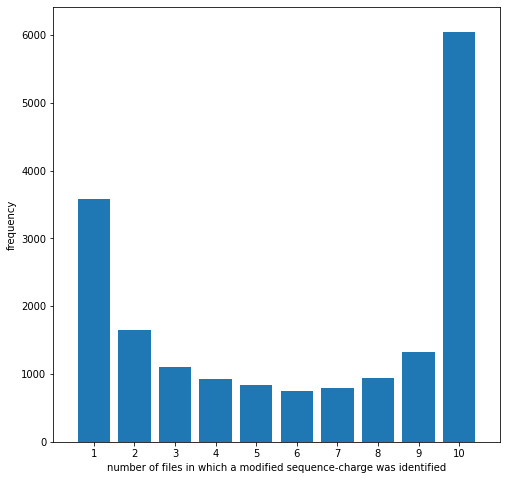

In [22]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
plt.margins(0.06)

counts = np.bincount(tfde_results_df.id_count_all_runs)
number_of_runs_in_subset = 10

ax1.bar(range(number_of_runs_in_subset+1), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,number_of_runs_in_subset+1), xlim=[0, number_of_runs_in_subset+1])
# plt.ylim((0,18000))

plt.show()

In [23]:
tfde_nonhuman_results_df = tfde_results_df[(tfde_results_df.id_species != "Human")]

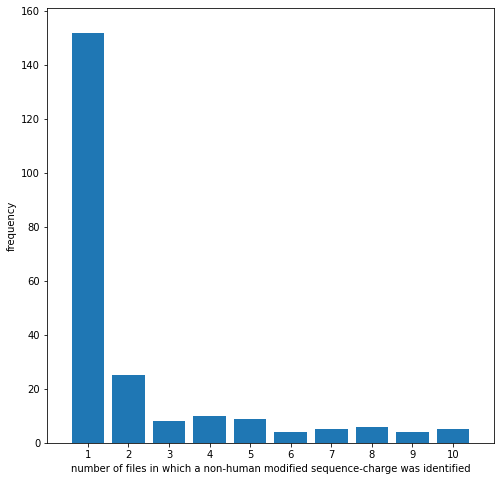

In [25]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
plt.margins(0.06)

counts = np.bincount(tfde_nonhuman_results_df.id_count_all_runs)
number_of_runs_in_subset = 10

ax1.bar(range(number_of_runs_in_subset+1), counts, width=0.8, align='center')
plt.xlabel('number of files in which a non-human modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,number_of_runs_in_subset+1), xlim=[0, number_of_runs_in_subset+1])
# plt.ylim((0,18000))

plt.show()

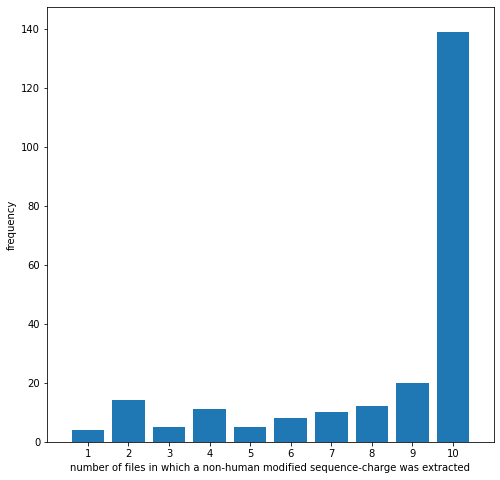

In [26]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
plt.margins(0.06)

counts = np.bincount(tfde_nonhuman_results_df.ext_count_all_runs)
number_of_runs_in_subset = 10

ax1.bar(range(number_of_runs_in_subset+1), counts, width=0.8, align='center')
plt.xlabel('number of files in which a non-human modified sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(1,number_of_runs_in_subset+1), xlim=[0, number_of_runs_in_subset+1])
# plt.ylim((0,18000))

plt.show()

#### prepare the MaxQuant results (MaxQuant was executed with MBR on)

In [27]:
MQ_RESULTS_DIR = '{}'.format(expanduser('~'))
mq_results_df = pd.read_csv('{}/MQ-analysis-of-P3856/combined-P3856_YHE010/txt/evidence.txt'.format(MQ_RESULTS_DIR), sep='\\t', engine='python')

In [28]:
# remove decoys, which are indicated by a '+' in the Reverse column
mq_results_df = mq_results_df[pd.isna(mq_results_df.Reverse)]
# remove identifications with no intensity
mq_results_df = mq_results_df[(mq_results_df.Intensity > 0)]
# remove potential contaminants
mq_results_df = mq_results_df[pd.isna(mq_results_df['Potential contaminant'])]
# remove identifications with mass error more than +/- 5 ppm
mq_results_df = mq_results_df[np.abs(mq_results_df['Mass error [ppm]']) <= 5.0]
# add RT as seconds
mq_results_df['retention_time_secs'] = mq_results_df['Retention time']*60.0

In [29]:
mq_results_df.Type.unique()

array(['TIMS-MULTI-MSMS', 'TIMS-MULTI-MATCH'], dtype=object)

In [30]:
# definition of uniqueness in MaxQuant output with MBR on
unique_peptide_key = ['Sequence','Modifications','Charge']

In [31]:
mq_results_df.sample(n=5)

,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,Potential contaminant,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Taxonomy IDs,retention_time_secs
124983,TLNLAGNLLESLSGLHK,17,Unmodified,_TLNLAGNLLESLSGLHK_,NaN,NaN,0,0,0,sp|Q9Y2I1|NISCH_HUMAN,...,NaN,124983,3541,12006,12256,78899.0,78899.0,None,NaN,2157.36
139268,VSQFLQVLETDLYR,14,Unmodified,NaN,NaN,NaN,0,0,0,sp|Q96MW5|COG8_HUMAN,...,NaN,139268,2731,13360,13640,NaN,NaN,None,NaN,2225.58
69804,LDEQQEFSAIILATAGLQR,19,Unmodified,_LDEQQEFSAIILATAGLQR_,NaN,NaN,0,0,0,sp|P08397|HEM3_HUMAN,...,NaN,69804,648,6711,6838,44216.0,44216.0,None,NaN,2274.06
68959,LATQLTGPVMPVR,13,Unmodified,_LATQLTGPVMPVR_,NaN,NaN,0,0,0,sp|P26373|RL13_HUMAN,...,NaN,68959,919,6642,6767,43682.0,43682.0,None,NaN,1855.14
80415,LQLDNQYAVLENQK,14,Unmodified,_LQLDNQYAVLENQK_,NaN,NaN,0,0,0,sp|Q9UKY7|CDV3_HUMAN,...,NaN,80415,3461,7717,7860,50993.0,50993.0,None,NaN,1846.44


In [32]:
mq_results_df[mq_results_df.Type=='TIMS-MULTI-MSMS'].sample(n=5)

,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,Potential contaminant,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Taxonomy IDs,retention_time_secs
10889,ASVSSATFSGHGAR,14,Acetyl (Protein N-term),_(Acetyl (Protein N-term))ASVSSATFSGHGAR_,NaN,NaN,1,0,0,sp|Q7Z4H3|HDDC2_HUMAN,...,NaN,10889,2247,1045,1068,6771.0,6771.0,None,NaN,1665.84
113936,SLDLFNCEVTNLNDYR,16,Unmodified,_SLDLFNCEVTNLNDYR_,NaN,NaN,0,0,0,sp|P39687|AN32A_HUMAN;sp|Q92688|AN32B_HUMAN,...,NaN,113936,1080;2545,10943,11177,71858.0,71858.0,None,NaN,2066.76
20446,DLTQMADELRR,11,Unmodified,_DLTQMADELRR_,NaN,NaN,0,0,1,sp|P41227|NAA10_HUMAN,...,NaN,20446,1105,1966,2005,12874.0,12874.0,None,NaN,1845.60
112246,SGGSGGCSGAGGASNCGTGSGR,22,Unmodified,_SGGSGGCSGAGGASNCGTGSGR_,NaN,NaN,0,0,0,sp|Q15005|SPCS2_HUMAN,...,NaN,112246,1872,10782,11013,70825.0,70825.0,None,NaN,917.16
137576,VPDGMVGLIIGR,12,Unmodified,_VPDGMVGLIIGR_,NaN,NaN,0,0,0,sp|Q92945|FUBP2_HUMAN,...,NaN,137576,2571,13199,13478,87134.0,87134.0,None,NaN,2051.52


In [58]:
mq_results_df['id_species'] = mq_results_df.apply(lambda row: classify_protein(row.Proteins), axis=1)

In [70]:
# count the number of runs each unique peptide was identified and extracted
mq_counts_l = []
for group_name,group_df in mq_results_df.groupby(unique_peptide_key, as_index=False):
    identifications_l = group_df[group_df.Type=='TIMS-MULTI-MSMS']['Raw file'].unique()
    extractions_l = group_df[group_df.Type=='TIMS-MULTI-MATCH']['Raw file'].unique()
    transfer_count = len(set(extractions_l) - set(identifications_l))
    species = classify_protein(' '.join(group_df.Proteins.tolist()))
    mq_counts_l.append({'peptide_key':group_name, 'species':species, 'transfer_count':transfer_count, 'id_count_all_runs':len(identifications_l), 'id_runs':identifications_l, 'ext_count_all_runs':len(extractions_l), 'ext_runs':extractions_l})
mq_counts_df = pd.DataFrame(mq_counts_l)

In [71]:
mq_counts_df.sample(n=5)

,peptide_key,species,transfer_count,id_count_all_runs,id_runs,ext_count_all_runs,ext_runs
4486,"(GGILAIASLIGVEGGNATR, Unmodified, 2)",Human,8,2,"[P3856_YHE010_2_Slot1-1_1_5094, P3856_YHE010_5...",8,"[P3856_YHE010_3_Slot1-1_1_5095, P3856_YHE010_4..."
1083,"(ASVPTIQDQASAMQLSQCAK, Unmodified, 2)",Human,0,10,"[P3856_YHE010_2_Slot1-1_1_5094, P3856_YHE010_3...",3,"[P3856_YHE010_4_Slot1-1_1_5096, P3856_YHE010_6..."
11364,"(SIYVGNVDYGATAEELEAHFHGCGSVNR, Unmodified, 4)",Human,5,2,"[P3856_YHE010_4_Slot1-1_1_5096, P3856_YHE010_1...",5,"[P3856_YHE010_2_Slot1-1_1_5094, P3856_YHE010_3..."
1629,"(DDDGGEDDDANCNLICGDEYGPETR, Unmodified, 2)",Human,0,10,"[P3856_YHE010_2_Slot1-1_1_5094, P3856_YHE010_3...",0,[]
2436,"(EAAGTTAAAGTGGATEQPPR, Unmodified, 2)",Human,4,1,[P3856_YHE010_10_Slot1-1_1_5102],4,"[P3856_YHE010_2_Slot1-1_1_5094, P3856_YHE010_6..."


In [94]:
# remove all failed extractions as we did for TFD/E
mq_counts_df = mq_counts_df[(mq_counts_df.ext_count_all_runs>0)]

#### false identification rate

In [95]:
number_of_unique_peptides_mq = len(mq_counts_df)
number_of_unique_peptides_mq

11275

In [96]:
number_of_unique_nonhuman_peptides_mq = len(mq_counts_df[(mq_counts_df.species != "Human")])
number_of_unique_nonhuman_peptides_mq

36

In [97]:
FDR_detection_mq = number_of_unique_nonhuman_peptides_mq/number_of_unique_peptides_mq*100
FDR_detection_mq

0.31929046563192903

#### false transfer rate

In [99]:
total_transfer_count_mq = mq_counts_df.transfer_count.sum()
total_transfer_count_mq

37298

In [100]:
false_transfer_count_mq = mq_counts_df[(mq_counts_df.species != "Human")].transfer_count.sum()
false_transfer_count_mq

83

In [101]:
false_transfer_rate = false_transfer_count_mq / total_transfer_count_mq * 100.0
false_transfer_rate

0.2225320392514344

In [98]:
mq_nonhuman_counts_df = mq_counts_df[(mq_counts_df.species != "Human")]

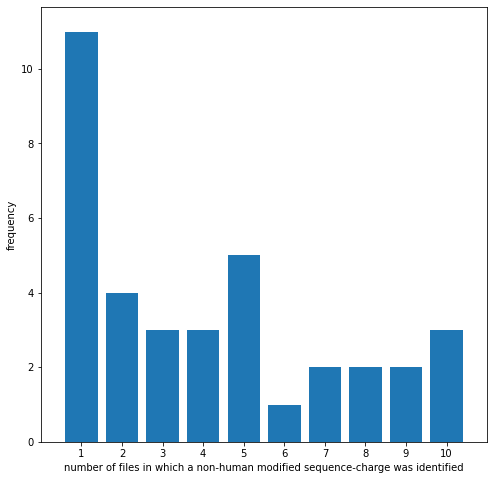

In [102]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
plt.margins(0.06)

counts = np.bincount(mq_nonhuman_counts_df.id_count_all_runs)
number_of_runs_in_subset = 10

ax1.bar(range(number_of_runs_in_subset+1), counts, width=0.8, align='center')
plt.xlabel('number of files in which a non-human modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,number_of_runs_in_subset+1), xlim=[0, number_of_runs_in_subset+1])
# plt.ylim((0,18000))

plt.show()

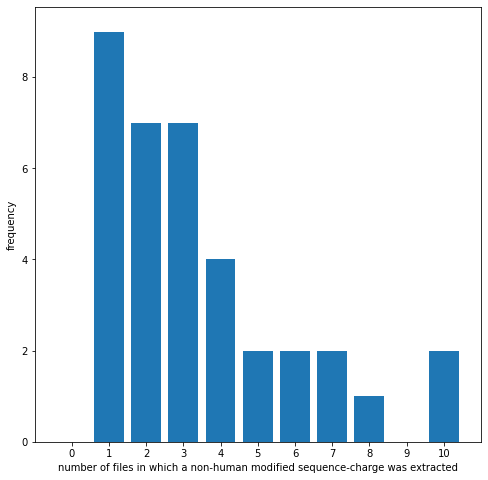

In [103]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(8)
plt.margins(0.06)

counts = np.bincount(mq_nonhuman_counts_df.ext_count_all_runs)
number_of_runs_in_subset = 10

ax1.bar(range(number_of_runs_in_subset+1), counts, width=0.8, align='center')
plt.xlabel('number of files in which a non-human modified sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(0,number_of_runs_in_subset+1), xlim=[-1, number_of_runs_in_subset+1])
# plt.ylim((0,18000))

plt.show()